# 1. Compute histogram for a color image

In [2]:
import cv2
import numpy as np
import math as Math
from matplotlib import pyplot as plt
from IPython.display import Image
import argparse


color_img1 = cv2.imread('imgs/underexposed.jpg', cv2.IMREAD_COLOR)

### Check my  (underexposed img) histogram against predefined histogram

In [2]:
# hist = cv2.calcHist([color_img1],[0],None,[256],[0,256])
# plt.hist(color_img1.ravel(),256,[0,256])
# plt.title('Histogram for underexposed picture')
# plt.show()

### My histogram for full image(underexposed)


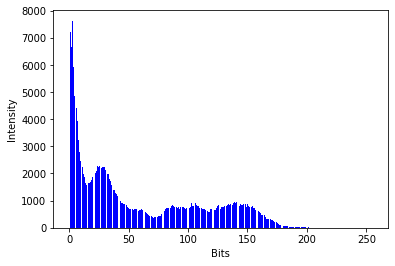

In [3]:
def manualHist(color_img1):
    row = color_img1.shape
    col = color_img1.shape #
    y = np.zeros((256), np.uint64)
#     r = range(0,row)
    for i in range(row[0]):
        for j in range(col[0]):
            y[color_img1[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x,y,color="blue",align="center")
    plt.ylabel('Intensity')
    plt.xlabel('Bits')
    plt.show()
#     print(row)
#     print(col)
    return [x,y]
manualHist(color_img1)
print()

## Split Underexposed image & plot Histograms

	 Red Histogram for Underexposed Img


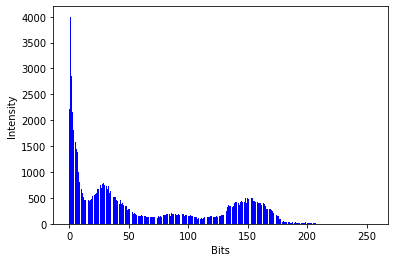

In [4]:
b,g,r = cv2.split(color_img1)
print('\t \bRed Histogram for Underexposed Img')
manualHist(r)
print()

	 Green Histogram for Underexposed Img


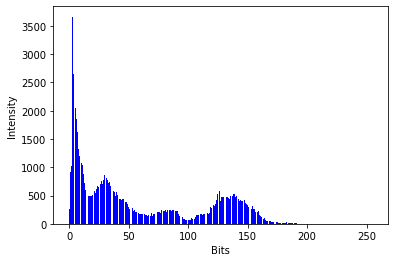

In [5]:
print('\t \bGreen Histogram for Underexposed Img')
manualHist(g)
print()

	 Blue Histogram for Underexposed Img


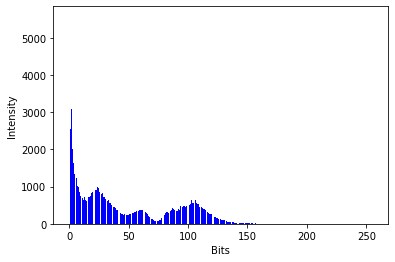

In [6]:
print('\t \bBlue Histogram for Underexposed Img')
manualHist(b)
print()

	 	Grayscale Intensity


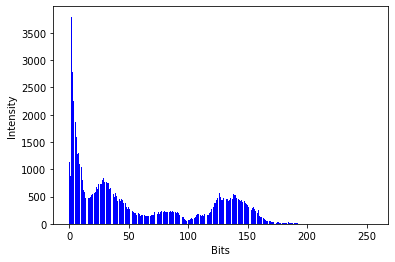

In [7]:
print('\t \tGrayscale Intensity')
img1_grey_mode = cv2.imread('imgs/underexposed.jpg', cv2.IMREAD_GRAYSCALE)
manualHist(img1_grey_mode)
print()

# Load Overexposed image

In [8]:
color_img2 = cv2.imread('imgs/overexposed1.jpg', cv2.IMREAD_COLOR)
# cv2.imshow('Overexposed',color_img2)

### Check my  (overexposed img) histogram against predefined histogram

In [9]:
# hist = cv2.calcHist([color_img2],[0],None,[256],[0,256])
# plt.hist(color_img2.ravel(),256,[0,256])
# plt.title('Histogram for overexposed picture')
# plt.show()

### My histogram (underexposed)

	 Histogram of Underexposed Image


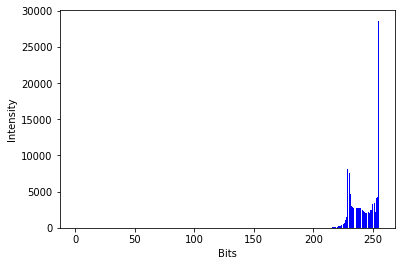

In [10]:
print('\t Histogram of Underexposed Image')
manualHist(color_img2)
print()

## Split Underexposed image & plot Histograms

	 Red Histogram for Underexposed Img


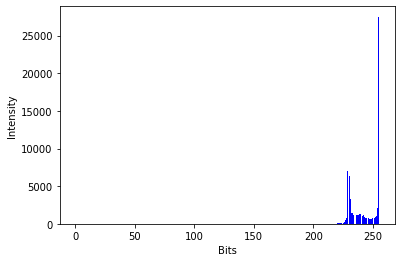

In [11]:
b,g,r = cv2.split(color_img2)
print('\t \bRed Histogram for Underexposed Img')
manualHist(r)
print()

	 Green Histogram for Underexposed Img


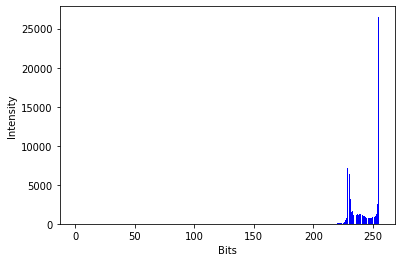

In [12]:
print('\t \bGreen Histogram for Underexposed Img')
manualHist(g)
print()

	 Blue Histogram for Underexposed Img


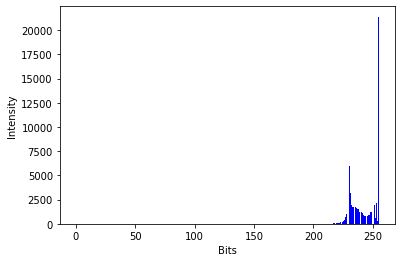

In [13]:
print('\t \bBlue Histogram for Underexposed Img')
manualHist(b)
print()

	 	Grayscale Intensity


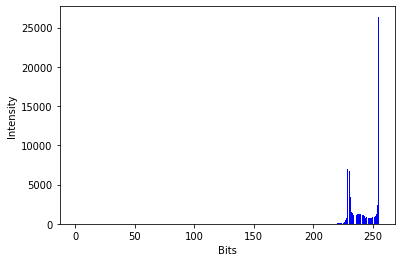

In [14]:
print('\t \tGrayscale Intensity')
img2_grey_mode = cv2.imread('imgs/overexposed1.jpg', cv2.IMREAD_GRAYSCALE)
manualHist(img2_grey_mode)
print()

### Differences in the histograms

The underexposed images has higher intensities on the lower end of the x-axis, and it get's lower as you get closer to 255 on the x-axis, then goes to zero.  

As for the overexposed image, it has higher intensities for each band on the right side of the x-axis. It's highest when you are at 255, and becomes lower as you move closer to the middle of the x-axis.

# 2. Generate Binary Image

In [15]:
 thresh = 70
# Numbers tested before 205 for threshold: 15, 115, 175, 196
img_wo_obj = cv2.imread('imgs/IMG_7300.jpg')
img_w_obj = cv2.imread('imgs/IMG_7301.jpg')
img1_bw = cv2.threshold(img_wo_obj, thresh, 0, cv2.THRESH_BINARY)[1]
img2_bw = cv2.threshold(img_w_obj, thresh, 255, cv2.THRESH_BINARY)[1]

In [16]:
diff = cv2.absdiff(img_w_obj, img2_bw)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
thresh = 110
imask =  mask>thresh

canvas = np.zeros_like(img2_bw, np.uint8)
# print(imask)
# img_w_obj[imask]
canvas[imask] = img2_bw[imask]
cv2.imwrite("imgs/result.jpg", canvas)
print('The total number of pixels: %s' % str(len(diff[0])+len(diff[1])))
print('You can view the binary')

The total number of pixels: 798
You can view the binary


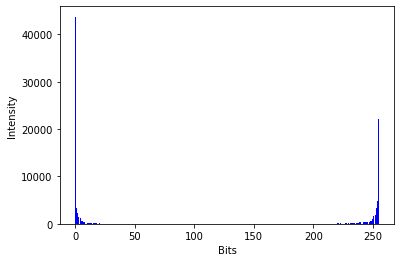

In [17]:
# Show histogram of result img
result_img = cv2.imread('imgs/result.jpg')
# result_img = cv2.cvtColor(result_img, cv2.COLOR_BAYER_BG2GRAY)
manualHist(result_img)
x = Image(filename='imgs/result.jpg') 

### Binary Image

<img src="imgs/result.jpg">

### Results for Question 2:

The number of pixels that belong to this object of interest is 798.

The histogram of this image mainly contains values that are either pure black or pure white, with some other small values of colours in between. As you can see in the result image above.

The reason the majority of the background is black is because when I took the difference between the foreground and background image, those values became 0, which translates to the absence of light, hence why it's black. My hand shows up mostly white, because the difference between the foreground image and background image was much greater at that point because my hand was now in the picture. Because the difference is higher, the values are much closer to 255, which is white in RGB. 

In my histogram above, there is a wide valley in between the values of white and black pixels, which are reflected in the result image. The other traces of the color values can be seen in my wrist in the result image above.

# 3. Generate an image in False Color using the Hyperspectral Image

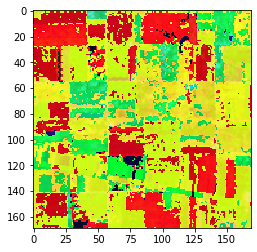

In [18]:
# Generate False color image from hyperspectral
# use spectral library to read hyperspectral Image
from spectral import *
import io
hyp_img0 = np.array('imgs/TIPJUL1.lan')
hyp_img = open_image('imgs/TIPJUL1.lan')
arr = hyp_img.load()
rgb_bands = (4,3,2)
hyp_img.shape
view = imshow(hyp_img, rgb_bands)
#  hyperspectral not that big, so no need to load
# arr = hyp_img.load()
# arr.shape
# arr.info()
x = np.zeros((169,169,7))
# hyp_img0.__class__
# ftp.storbinary('view.jpg', temp.getvalue())


### Generate NDVI image from hyperspectral

In [19]:
import rasterio as rio
from rasterio import *

In [20]:
# b4 = rio.open('imgs/TIPJUL1.lan')
# b8 = rio.open('imgs/TIPJUL1.lan')

# # read Red(b4) and NIR(b8) as arrays
# red = b4.read()
# nir = b8.read()

# # Calculate ndvi
# ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# # Write the NDVI image
# meta = b4.meta
# meta.update(driver='GTiff')
# meta.update(dtype=rio.float32)

# with rio.open('imgs/NDVI.jpg', 'w', **meta) as dst:
#     dst.write(ndvi.astype(rio.float32))

#### NDVI Image


/Users/jazmyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/jazmyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

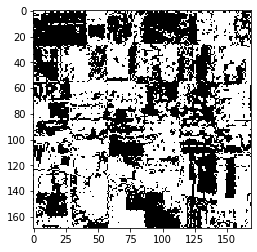

In [21]:
# plt.imsave("imgs/NDVI.jpg", ndvi, cmap=plt.cm.summer)
x = hyp_img.shape[0]
y = hyp_img.shape[1]
bands = hyp_img.shape[2]

ndvi_img = np.zeros([x,y])
RED = hyp_img[:,:,4]
NIR = hyp_img[:,:,3]

NIR = (NIR+128)/255
RED = (RED+128)/255
NDVI = (NIR-RED)/(NIR+RED)

for i in range(x):
    for j in range(y):
        ndvi_img[i,j]=1 if NDVI[i,j]>0 else ndvi_img[i,j]

view = imshow(ndvi_img)
view

# 4. Obtain Raster from Lidar Image

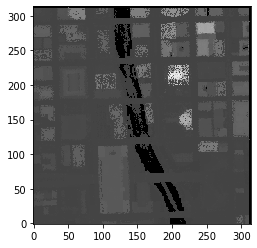

In [85]:
from laspy.file import File

source = 'imgs/17258975.las'
las = File(source, mode='r')
lat = las.x 
lon = las.y * 10**-4
alt = las.z
intensity = las.intensity
# print(lat)
# print(lon)
# print(alt)
# print(lat.mean())
# new_x = lat - (np.ones(len(lat))*lat.mean)
# for x,y,z,ite,c,nr,rn, in np.nditer([las.x,las.y,las.z,las.intensity,las.Classification,las.num_returns,las.return_num]):
#     print(" Longitude: " ,x)
#     print(" Latitude: " ,y)
#     print(" Altitude: " ,z)
#     print(" Intensity value: " ,ite)
#     print(" Number of Returns: " ,nr)
#     print(" Return Number: " ,rn)   
#     print("\n")
max_lat = np.amax(lat)
min_lat = np.amin(lat)
max_lon = np.amax(lon)
min_lon = np.amin(lon)
maxHeight = np.amax(alt)
minHeight = np.amin(alt)

xx, yy = np.meshgrid(np.linspace(min_lat,max_lon,8), np.linspace(min_lon,max_lat,8))
np.dot(matrix,np.average(alt))
z = matrix
plt.imshow(z, origin='lower', interpolation='none')
plt.show()